In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.auth.transport.requests import Request
from google.auth import default

creds, _ = default()
creds.refresh(Request())

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
data_folder = '/content/drive/My Drive/AI_Recruitment_Project'
os.listdir(data_folder)  # List all files in the folder


['dataset1.xlsx',
 'dataset2.xlsx',
 'dataset3.xlsx',
 'dataset4.xlsx',
 'dataset5.xlsx',
 'dataset6.xlsx',
 'dataset7.xlsx',
 'dataset8.xlsx',
 'dataset9.xlsx']

In [ ]:
import pandas as pd
import glob


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Get all Excel files in the folder
all_files = glob.glob(os.path.join(data_folder, "*.xlsx"))

# Combine all files into one DataFrame
df = pd.concat([pd.read_excel(file) for file in all_files], ignore_index=True)

# Display the shape and first few rows of the combined DataFrame
print("Combined Dataset Shape:", df.shape)



Combined Dataset Shape: (3250, 8)


In [ ]:
df

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description
0,brenbr359,Brent Brown,Product Manager,Product Manager Interview Transcript\n\nInterv...,Here's a sample resume for Brent Brown applyin...,select,Experience,We are looking for a skilled Product Manager w...
1,jameay305,James Ayala,Software Engineer,Software Engineer Interview Transcript\n\nInte...,Here's a sample resume for James Ayala applyin...,select,Experience,We are looking for a skilled Software Engineer...
2,scotri565,Scott Rivera,Data Engineer,Here is a simulated interview for Scott Rivera...,Here's a sample resume for Scott Rivera applyi...,reject,Experience,We are looking for a skilled Data Engineer wit...
3,emilke232,Emily Kelly,UI Engineer,Interview Transcript: Emily Kelly for UI Engin...,Here's a sample resume for Emily Kelly:\n\nEmi...,select,Experience,We are looking for a skilled UI Engineer with ...
4,ashlra638,Ashley Ray,Data Scientist,Data Scientist Interview Transcript\n\nCompany...,Here's a sample resume for Ashley Ray applying...,reject,Cultural Fit,We are looking for a skilled Data Scientist wi...
...,...,...,...,...,...,...,...,...
3245,KotaSai196,Mahin Tiwari,Software Developer,"**Interviewer:** Rohan Desai, Technical Lead\n...",Here's a detailed dummy resume for Mahin Tiwar...,Select,"Adaptability, Strong technical knowledge","Expected_experience : 9+ years, Domains: Web D..."
3246,KotaSai197,Yashika Gupta,Software Developer,"**Interviewer:** Hi Yashika, thanks for coming...",Here's a detailed dummy resume for Yashika Gup...,Select,"Strong technical knowledge, Proven leadership ...","Expected_experience : 0-2 years, Domains: Web ..."
3247,KotaSai198,Rachna Rathore,Software Developer,**Interview Transcript**\n\n**Rachna Rathore**...,Here's a detailed dummy resume for candidate R...,Select,"Strong technical knowledge, High enthusiasm fo...","Expected_experience : 0-2 years, Domains: Web ..."
3248,KotaSai199,Janki Garg,Software Developer,**Interview Transcript**\n\n**Interviewer:** R...,Here's a detailed dummy resume for Janki Garg:...,Reject,"Low problem-solving abilities, Inability to co...","Expected_experience : 0-2 years, Domains: Web ..."


In [ ]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df = df.applymap(lambda x: str(x).replace("**", "") if isinstance(x, str) else x)
df['length_of_transcript'] = df['Transcript'].apply(lambda x: len(x))

<ipython-input-6-16c7f4c13290>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
<ipython-input-6-16c7f4c13290>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace("**", "") if isinstance(x, str) else x)


In [ ]:
df = df.applymap(lambda x: str(x).replace("rejected", "reject") if isinstance(x, str) else x)
df = df.applymap(lambda x: str(x).replace("selected", "select") if isinstance(x, str) else x)

<ipython-input-7-244d19a73e89>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace("rejected", "reject") if isinstance(x, str) else x)
<ipython-input-7-244d19a73e89>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace("selected", "select") if isinstance(x, str) else x)


In [ ]:
df

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,length_of_transcript
0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,select,experience,we are looking for a skilled product manager w...,3687
1,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,select,experience,we are looking for a skilled software engineer...,4262
2,scotri565,scott rivera,data engineer,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,reject,experience,we are looking for a skilled data engineer wit...,2956
3,emilke232,emily kelly,ui engineer,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,select,experience,we are looking for a skilled ui engineer with ...,4310
4,ashlra638,ashley ray,data scientist,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,reject,cultural fit,we are looking for a skilled data scientist wi...,3307
...,...,...,...,...,...,...,...,...,...
3245,kotasai196,mahin tiwari,software developer,"interviewer: rohan desai, technical lead\ncand...",here's a detailed dummy resume for mahin tiwar...,select,"adaptability, strong technical knowledge","expected_experience : 9+ years, domains: web d...",3624
3246,kotasai197,yashika gupta,software developer,"interviewer: hi yashika, thanks for coming in ...",here's a detailed dummy resume for yashika gup...,select,"strong technical knowledge, proven leadership ...","expected_experience : 0-2 years, domains: web ...",4876
3247,kotasai198,rachna rathore,software developer,interview transcript\n\nrachna rathore\nsoftwa...,here's a detailed dummy resume for candidate r...,select,"strong technical knowledge, high enthusiasm fo...","expected_experience : 0-2 years, domains: web ...",4572
3248,kotasai199,janki garg,software developer,"interview transcript\n\ninterviewer: rohan, te...",here's a detailed dummy resume for janki garg:...,reject,"low problem-solving abilities, inability to co...","expected_experience : 0-2 years, domains: web ...",4703


In [ ]:
df[['length_of_transcript','decision']].groupby('decision').mean()

,length_of_transcript
decision,
reject,3934.026458
select,4578.613106


In [ ]:
df['num_words_in_transcript'] = df['Transcript'].apply(lambda x: len(str(x).split()))

In [ ]:
df[['num_words_in_transcript','decision','Role']].groupby(['Role','decision']).agg({'mean','median','std'})

num_words_in_transcript         \
                                                          std median   
Role                         decision                                  
ai engineer                  reject                 18.212633  555.0   
                             select                204.121419  682.0   
business analyst             reject                110.323615  578.0   
                             select                 54.802980  693.5   
cloud architect              reject                 76.906870  619.0   
                             select                 19.670197  796.5   
content writer               reject                 61.554854  532.0   
                             select                 30.405592  684.5   
cybersecurity specialist     reject                123.835375  604.5   
                             select                 77.929455  671.0   
data analyst                 reject                122.354873  694.0   
                             select                109.459986  760.0   
data engineer                reject                129.799075  631.0   
                             select                130.921223  754.0   
data scientist               reject                125.954125  653.0   
                             select                135.307700  728.5   
database administrator       reject                 73.432509  571.0   
                             select                 87.793887  732.5   
devops engineer              reject                 61.727223  621.0   
                             select                 49.273510  700.0   
digital marketing specialist reject                 43.657760  627.0   
                             select                 72.875083  694.0   
game developer               reject                179.199144  537.0   
                             select                311.369020  302.0   
graphic designer             reject                 61.207930  530.5   
                             select                 63.439510  676.0   
hr specialist                reject                 66.817413  646.5   
                             select                 94.219779  729.5   
machine learning engineer    reject                100.349390  617.5   
                             select                 72.034053  845.0   
mobile app developer         reject                 88.803153  609.5   
                             select                 11.372481  646.0   
network engineer             reject                 92.458699  516.0   
                             select                 60.419171  799.0   
product manager              reject                118.320182  620.0   
                             select                131.864261  764.0   
project manager              reject                 92.922439  677.0   
                             select                 82.964084  735.5   
software developer           reject                126.307029  685.0   
                             select                 85.288800  691.0   
software engineer            reject                168.196672  630.5   
                             select                154.588161  721.0   
system administrator         reject                 48.280431  574.0   
                             select                  7.778175  761.5   
ui designer                  reject                133.628907  733.0   
                             select                108.505000  766.0   
ui engineer                  reject                124.736686  565.0   
                             select                168.401848  665.0   
ui/ux designer               reject                 65.199693  505.0   
                             select                 53.618249  739.0   

                                                   
                                             mean  
Role                         decision              
ai engineer                  reject    567.200000  
             

<ipython-input-12-166d6d9334b1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['decision']=='reject']['num_words_in_transcript'])


<Axes: xlabel='num_words_in_transcript', ylabel='Density'>

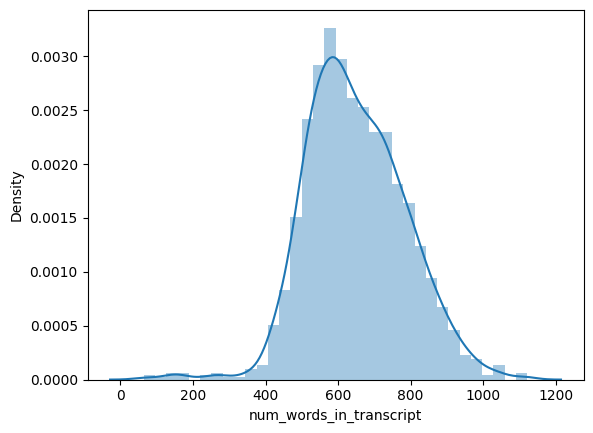

In [ ]:
sns.distplot(df[df['decision']=='reject']['num_words_in_transcript'])

<ipython-input-13-abd76a176a00>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['decision']=='select']['num_words_in_transcript'])


<Axes: xlabel='num_words_in_transcript', ylabel='Density'>

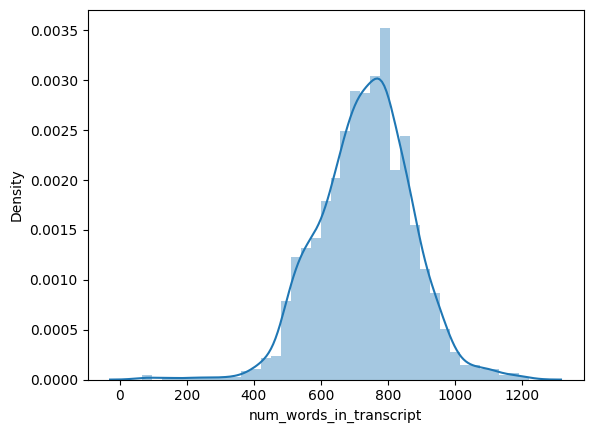

In [ ]:
sns.distplot(df[df['decision']=='select']['num_words_in_transcript'])

Decision Distribution:
 decision
reject    1663
select    1587
Name: count, dtype: int64


<ipython-input-14-dd3a0022dcda>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='decision', palette='viridis')


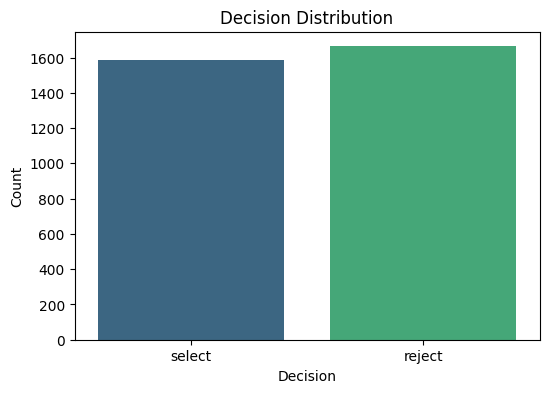

In [ ]:
# Step 1: Analyze Decision Distribution
decision_counts = df['decision'].value_counts()
print("Decision Distribution:\n", decision_counts)

# Plot decision distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='decision', palette='viridis')
plt.title('Decision Distribution')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

Cosine Similarity:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine Transcript and Job Description into a single dataframe for vectorization
transcript_and_job_desc = df[['Transcript', 'Job Description']].fillna('')

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text columns
tfidf_matrix = vectorizer.fit_transform(
    transcript_and_job_desc['Transcript'] + ' ' + transcript_and_job_desc['Job Description']
)

# Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Extract diagonal elements representing Transcript-Job Description similarity
similarity_scores = [cosine_similarity(tfidf_matrix[i:i+1], tfidf_matrix[i:i+1])[0][0]
                     for i in range(len(df))]

# Add the scores to the dataframe
df['Transcript_Score using Cosine Similarity'] = similarity_scores




In [ ]:
# Display the dataframe with the new column
df[['Transcript', 'Job Description', 'Transcript_Score using Cosine Similarity']]

,Transcript,Job Description,Transcript_Score using Cosine Similarity
0,product manager interview transcript\n\ninterv...,we are looking for a skilled product manager w...,1.0
1,software engineer interview transcript\n\ninte...,we are looking for a skilled software engineer...,1.0
2,here is a simulated interview for scott rivera...,we are looking for a skilled data engineer wit...,1.0
3,interview transcript: emily kelly for ui engin...,we are looking for a skilled ui engineer with ...,1.0
4,data scientist interview transcript\n\ncompany...,we are looking for a skilled data scientist wi...,1.0
...,...,...,...
3245,"interviewer: rohan desai, technical lead\ncand...","expected_experience : 9+ years, domains: web d...",1.0
3246,"interviewer: hi yashika, thanks for coming in ...","expected_experience : 0-2 years, domains: web ...",1.0
3247,interview transcript\n\nrachna rathore\nsoftwa...,"expected_experience : 0-2 years, domains: web ...",1.0
3248,"interview transcript\n\ninterviewer: rohan, te...","expected_experience : 0-2 years, domains: web ...",1.0


BERT based similarity

In [ ]:
from sentence_transformers import SentenceTransformer

# Load pre-trained BERT model
#model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode Transcript and Job Description
#transcript_embeddings = model.encode(df['Transcript'].fillna(''), convert_to_tensor=True)
#job_description_embeddings = model.encode(df['Job Description'].fillna(''), convert_to_tensor=True)

# Calculate cosine similarity
similarity_scores = [float(cosine_similarity([transcript_embeddings[i]], [job_description_embeddings[i]])[0][0])
                     for i in range(len(df))]

# Add the scores to the dataframe
df['Transcript_Score using BERT'] = similarity_scores


NameError: name 'transcript_embeddings' is not defined

In [ ]:
# Display the dataframe with the new column
df[['Transcript', 'Job Description', 'Transcript_Score using BERT']]

In [ ]:
df['Transcript_Score']=(df['Transcript_Score using Cosine Similarity']+df['Transcript_Score using BERT']/2)

In [ ]:
df

In [ ]:
# Remove a column (e.g., 'Transcript_Score') from the DataFrame
df = df.drop(columns=['Transcript_Score'])
df = df.drop(columns=['Transcript_Score using BERT'])
df = df.drop(columns=['Transcript_Score using Cosine Similarity'])

Combined similarity measure

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import numpy as np

# Step 1: Compute TF-IDF Similarity
vectorizer = TfidfVectorizer(stop_words='english')

# Fill missing values
df['Transcript'] = df['Transcript'].fillna('')
df['Job Description'] = df['Job Description'].fillna('')

# Combine Transcript and Job Description into a single dataframe for vectorization
tfidf_matrix = vectorizer.fit_transform(
    df['Transcript'] + ' ' + df['Job Description']
)

# Compute pairwise cosine similarity
tfidf_similarity_scores = [
    cosine_similarity(tfidf_matrix[i:i+1], tfidf_matrix[i:i+1])[0][0]
    for i in range(len(df))
]

# Normalize TF-IDF scores
tfidf_similarity_normalized = np.array(tfidf_similarity_scores) / max(tfidf_similarity_scores)

# Step 2: Compute BERT-based Similarity
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode Transcript and Job Description
transcript_embeddings = model.encode(df['Transcript'], convert_to_tensor=True)
job_description_embeddings = model.encode(df['Job Description'], convert_to_tensor=True)

# Calculate cosine similarity for embeddings
bert_similarity_scores = [
    float(cosine_similarity([transcript_embeddings[i]], [job_description_embeddings[i]])[0][0])
    for i in range(len(df))
]

# Normalize BERT scores
bert_similarity_normalized = np.array(bert_similarity_scores) / max(bert_similarity_scores)

# Step 3: Combine Scores
# Use weighted average (adjust weights as needed)
weights = {'tfidf': 0.5, 'bert': 0.5}  # Equal weighting
combined_scores = (weights['tfidf'] * tfidf_similarity_normalized +
                   weights['bert'] * bert_similarity_normalized) * 100




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Add combined scores to the dataframe
df['Transcript_Score'] = combined_scores

In [ ]:
df

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,length_of_transcript,num_words_in_transcript,Transcript_Score
0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,select,experience,we are looking for a skilled product manager w...,3687,620,84.660904
1,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,select,experience,we are looking for a skilled software engineer...,4262,687,82.276030
2,scotri565,scott rivera,data engineer,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,reject,experience,we are looking for a skilled data engineer wit...,2956,511,84.144917
3,emilke232,emily kelly,ui engineer,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,select,experience,we are looking for a skilled ui engineer with ...,4310,748,85.309872
4,ashlra638,ashley ray,data scientist,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,reject,cultural fit,we are looking for a skilled data scientist wi...,3307,541,80.186193
...,...,...,...,...,...,...,...,...,...,...,...
3245,kotasai196,mahin tiwari,software developer,"interviewer: rohan desai, technical lead\ncand...",here's a detailed dummy resume for mahin tiwar...,select,"adaptability, strong technical knowledge","expected_experience : 9+ years, domains: web d...",3624,574,73.085572
3246,kotasai197,yashika gupta,software developer,"interviewer: hi yashika, thanks for coming in ...",here's a detailed dummy resume for yashika gup...,select,"strong technical knowledge, proven leadership ...","expected_experience : 0-2 years, domains: web ...",4876,792,75.481939
3247,kotasai198,rachna rathore,software developer,interview transcript\n\nrachna rathore\nsoftwa...,here's a detailed dummy resume for candidate r...,select,"strong technical knowledge, high enthusiasm fo...","expected_experience : 0-2 years, domains: web ...",4572,735,76.934434
3248,kotasai199,janki garg,software developer,"interview transcript\n\ninterviewer: rohan, te...",here's a detailed dummy resume for janki garg:...,reject,"low problem-solving abilities, inability to co...","expected_experience : 0-2 years, domains: web ...",4703,789,69.668847


In [ ]:
df[['Transcript_Score','decision']].groupby('decision').mean()

,Transcript_Score
decision,
reject,75.365815
select,77.303705


In [ ]:
df[['Transcript_Score','decision']].groupby('decision').median()

,Transcript_Score
decision,
reject,75.568454
select,77.220765


In [ ]:
df[['Transcript_Score','decision']].groupby('decision').std()

,Transcript_Score
decision,
reject,9.632041
select,9.681247


Word Count Analysis vs. Transcript Score

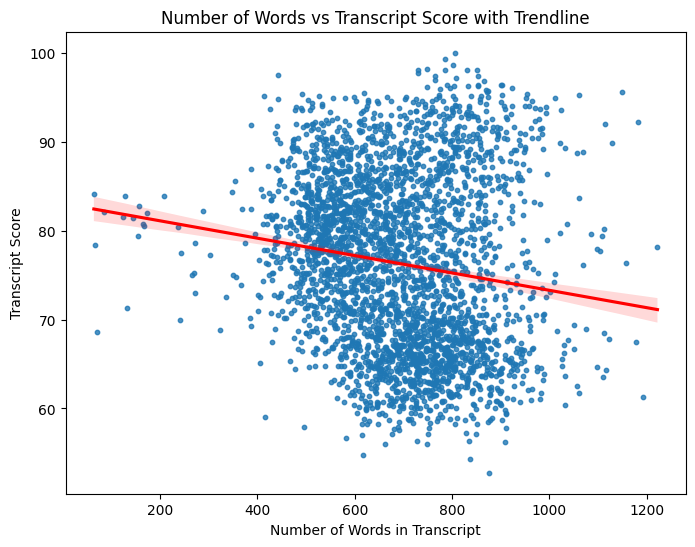

In [ ]:
# Scatter plot with a trendline (using a rolling mean for smoothing)
plt.figure(figsize=(8, 6))
sns.regplot(x='num_words_in_transcript', y='Transcript_Score', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Number of Words vs Transcript Score with Trendline')
plt.xlabel('Number of Words in Transcript')
plt.ylabel('Transcript Score')
plt.show()


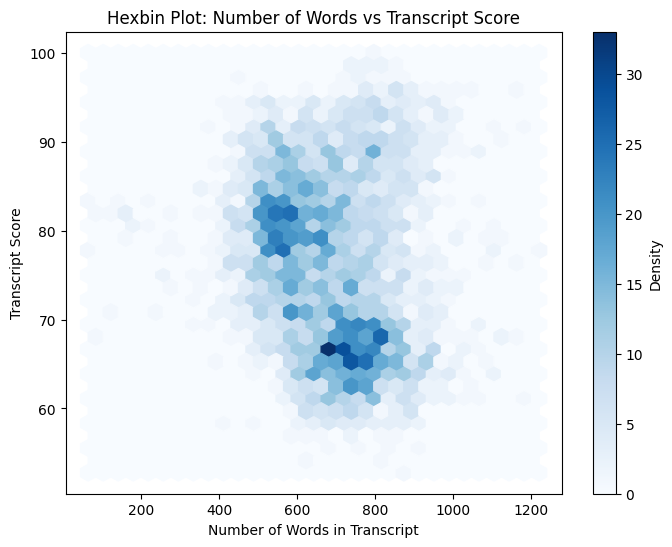

In [ ]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['num_words_in_transcript'], df['Transcript_Score'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Hexbin Plot: Number of Words vs Transcript Score')
plt.xlabel('Number of Words in Transcript')
plt.ylabel('Transcript Score')
plt.show()


## **NLP TECHNIQUES**


In [ ]:
import re

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Adding new columns for cleaned text
df['cleaned_transcript'] = df['Transcript'].apply(preprocess_text)
df['cleaned_resume'] = df['Resume'].apply(preprocess_text)
df['cleaned_job_description'] = df['Job Description'].apply(preprocess_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_transcript'])

# Convert the sparse matrix into a DataFrame with feature names as column names
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Adding TF-IDF features as new columns
df = pd.concat([df, tfidf_df], axis=1)

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return ', '.join(entities)

# Adding a new column for named entities
df['named_entities'] = df['cleaned_transcript'].apply(extract_entities)


In [ ]:
df['named_entities']

,named_entities
0,"rachel lee, 10 2023, 200 pm, rachel lee, after..."
1,"rachel kim, james ayala, 10 2023, 200 pm, toda..."
2,"rachel lee, scott rivera, san francisco, rache..."
3,"rachel lee, san francisco, rachel lee good mor..."
4,"rachel kim, ashley ray, 12 2023, 1000 am, rach..."
...,...
3245,"12 2023, today, nine years, one"
3246,"today, the past three years, one, 30, one, jav..."
3247,"rohan sharma, 10 2023, 1000 am, rohan sharma, ..."
3248,"janki garg, today, a few months, one, javascri..."


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Define a function to remove stopwords from text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)  # Tokenize the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Create a new column 'transcript_no_stopwords' by applying the function
df['transcript_new'] = df['Transcript'].apply(remove_stopwords)


Sentiment Analysis

In [ ]:
pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.8 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def vader_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']

df['vader_sentiment'] = df['Transcript'].apply(vader_sentiment)


In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['textblob_sentiment'] = df['Transcript'].apply(textblob_sentiment)


2. Emotion Analysis


In [ ]:
pip install nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=020db9a34fde38eaf6f67f9f305e2a4bf02481f11bf36ef09b8158f7658f6769
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex


In [ ]:
from nrclex import NRCLex

def nrc_emotion(text):
    emotion = NRCLex(text)
    return emotion.top_emotions  # Access the top_emotions attribute, not a callable function

# Apply it to your DataFrame column
df['nrc_emotion'] = df['Transcript'].apply(nrc_emotion)


Entropy to find if the candidate has used repetitive words or uniques words

In [ ]:
import math

def calculate_entropy(text):
    words = text.split()
    word_freq = {word: words.count(word) for word in set(words)}
    entropy = -sum((count / len(words)) * math.log(count / len(words), 2) for count in word_freq.values())
    return entropy

df['text_entropy'] = df['Transcript'].apply(calculate_entropy)


In [ ]:
df

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,length_of_transcript,num_words_in_transcript,...,the,to,with,you,named_entities,transcript_new,vader_sentiment,textblob_sentiment,nrc_emotion,text_entropy
0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,select,experience,we are looking for a skilled product manager w...,3687,620,...,0.267615,0.535065,0.048627,0.485825,"rachel lee, 10 2023, 200 pm, rachel lee, after...",product manager interview transcript interview...,0.9986,0.107568,"[(positive, 0.35135135135135137)]",7.484895
1,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,select,experience,we are looking for a skilled software engineer...,4262,687,...,0.456061,0.296348,0.136734,0.387056,"rachel kim, james ayala, 10 2023, 200 pm, toda...",software engineer interview transcript intervi...,0.9969,0.091728,"[(positive, 0.2974683544303797)]",7.657594
2,scotri565,scott rivera,data engineer,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,reject,experience,we are looking for a skilled data engineer wit...,2956,511,...,0.154049,0.231002,0.307908,0.384530,"rachel lee, scott rivera, san francisco, rache...",simulated interview scott rivera applying role...,0.9955,0.060836,"[(positive, 0.3404255319148936)]",7.175661
3,emilke232,emily kelly,ui engineer,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,select,experience,we are looking for a skilled ui engineer with ...,4310,748,...,0.188825,0.377534,0.235886,0.447771,"rachel lee, san francisco, rachel lee good mor...",interview transcript : emily kelly ui engineer...,0.9954,0.100418,"[(positive, 0.29896907216494845)]",7.652681
4,ashlra638,ashley ray,data scientist,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,reject,cultural fit,we are looking for a skilled data scientist wi...,3307,541,...,0.217587,0.403966,0.062130,0.496578,"rachel kim, ashley ray, 12 2023, 1000 am, rach...",data scientist interview transcript company : ...,0.9901,0.042577,"[(positive, 0.30303030303030304)]",7.530497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,kotasai196,mahin tiwari,software developer,"interviewer: rohan desai, technical lead\ncand...",here's a detailed dummy resume for mahin tiwar...,select,"adaptability, strong technical knowledge","expected_experience : 9+ years, domains: web d...",3624,574,...,0.533947,0.422578,0.266810,0.333204,"12 2023, today, nine years, one","interviewer : rohan desai , technical lead can...",0.9985,0.191294,"[(positive, 0.36607142857142855)]",7.498089
3246,kotasai197,yashika gupta,software developer,"interviewer: hi yashika, thanks for coming in ...",here's a detailed dummy resume for yashika gup...,select,"strong technical knowledge, proven leadership ...","expected_experience : 0-2 years, domains: web ...",4876,792,...,0.406781,0.516141,0.140722,0.281185,"today, the past three years, one, 30, one, jav...","interviewer : hi yashika , thanks coming today...",0.9994,0.268455,"[(positive, 0.3116883116883117)]",7.634139
3247,kotasai198,rachna rathore,software developer,interview transcript\n\nrachna rathore\nsoftwa...,here's a detailed dummy resume for candidate r...,select,"strong technical knowledge, high enthusiasm fo...","expected_experience : 0-2 years, domains: web ...",4572,735,...,0.350192,0.420101,0.157490,0.314689,"rohan sharma, 10 2023, 1000 am, rohan sharma, ...",interview transcript rachna rathore software d...,0.9995,0.275227,"[(positive, 0.3263888888888889)]",7.639031
3248,kotasai199,janki garg,software developer,"interview transcript\n\ninterviewer: rohan, te...",here's a detailed dummy resume for janki garg:...,reject,"low problem-solving abilities, ina

Semantic Similarity between Transcript and Resume

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('all-MiniLM-L6-v2')

def calculate_similarity(transcript, resume):
    transcript_embedding = model.encode([transcript])
    resume_embedding = model.encode([resume])
    return cosine_similarity(transcript_embedding, resume_embedding)[0][0]

df['similarity_score'] = df.apply(lambda row: calculate_similarity(row['Transcript'], row['Resume']), axis=1)


Education-Experience Mismatch

In [ ]:
def extract_education(resume):
    doc = nlp(resume)
    education = [ent.text for ent in doc.ents if ent.label_ == 'ORG']  # Filter for organizations (universities)
    return education

df['resume_education'] = df['Resume'].apply(extract_education)
df['transcript_education_mentions'] = df.apply(lambda row: any(edu in row['Transcript'] for edu in row['resume_education']), axis=1)


Skills Gap Detection (Transcript vs. Resume)

In [ ]:
def extract_skills(text, skill_keywords):
    return [skill for skill in skill_keywords if skill.lower() in text.lower()]

skill_keywords = ['python', 'machine learning', 'data science', 'leadership', 'communication']  # Example skills
df['resume_skills'] = df['Resume'].apply(lambda x: extract_skills(x, skill_keywords))
df['transcript_skills'] = df['Transcript'].apply(lambda x: extract_skills(x, skill_keywords))

df['skill_gap'] = df.apply(lambda row: len(set(row['resume_skills']).difference(set(row['transcript_skills']))), axis=1)


In [ ]:
df

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,length_of_transcript,num_words_in_transcript,...,vader_sentiment,textblob_sentiment,nrc_emotion,text_entropy,resume_education,transcript_education_mentions,similarity_score,resume_skills,transcript_skills,skill_gap
0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,select,experience,we are looking for a skilled product manager w...,3687,620,...,0.9986,0.107568,"[(positive, 0.35135135135135137)]",7.484895,"[abc, kanban, the xyz corporation's, abc]",False,0.666933,"[leadership, communication]",[communication],1
1,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,select,experience,we are looking for a skilled software engineer...,4262,687,...,0.9969,0.091728,"[(positive, 0.2974683544303797)]",7.657594,[james.ayala@email.com](mailto:james.ayala@ema...,True,0.634629,"[python, machine learning]","[python, communication]",1
2,scotri565,scott rivera,data engineer,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,reject,experience,we are looking for a skilled data engineer wit...,2956,511,...,0.9955,0.060836,"[(positive, 0.3404255319148936)]",7.175661,"[scott rivera, abc corporation]",True,0.683043,"[python, machine learning]",[python],1
3,emilke232,emily kelly,ui engineer,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,select,experience,we are looking for a skilled ui engineer with ...,4310,748,...,0.9954,0.100418,"[(positive, 0.29896907216494845)]",7.652681,"[git, abc company]",False,0.685693,[],[],0
4,ashlra638,ashley ray,data scientist,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,reject,cultural fit,we are looking for a skilled data scientist wi...,3307,541,...,0.9901,0.042577,"[(positive, 0.30303030303030304)]",7.530497,"[sql, abc company, abc university, science cou...",True,0.606553,"[python, machine learning, data science, commu...","[python, machine learning, data science]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,kotasai196,mahin tiwari,software developer,"interviewer: rohan desai, technical lead\ncand...",here's a detailed dummy resume for mahin tiwar...,select,"adaptability, strong technical knowledge","expected_experience : 9+ years, domains: web d...",3624,574,...,0.9985,0.191294,"[(positive, 0.36607142857142855)]",7.498089,"[node.js, git, node.js]",True,0.612277,"[python, machine learning, data science]",[],3
3246,kotasai197,yashika gupta,software developer,"interviewer: hi yashika, thanks for coming in ...",here's a detailed dummy resume for yashika gup...,select,"strong technical knowledge, proven leadership ...","expected_experience : 0-2 years, domains: web ...",4876,792,...,0.9994,0.268455,"[(positive, 0.3116883116883117)]",7.634139,"[node.js, android, node.js]",True,0.622589,[],[leadership],0
3247,kotasai198,rachna rathore,software developer,interview transcript\n\nrachna rathore\nsoftwa...,here's a detailed dummy resume for candidate r...,select,"strong technical knowledge, high enthusiasm fo...","expected_experience : 0-2 years, domains: web ...",4572,735,...,0.9995,0.275227,"[(positive, 0.3263888888888889)]",7.639031,"[git, microsoft, node.js, delhi technological ...",True,0.679401,[python],[communication],1
3248,kotasai199,janki garg,software developer,"interview transcript\n\ninterviewer: rohan, te...",here's a detailed dummy resume for janki garg:...,reject,"low problem-solving abilities, inability to co...","expected_experience : 0-2 years, domains: web ...",4703,789,...,0.9986,0.139286,"[(positive, 0.30409356725146197)]",7.459617,"[node.js, git, microsoft, abc company, node.js]",True,0.541721,"[python, machine learning, communication]",[],3


<ipython-input-65-d9def5502304>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['decision']=='select']['textblob_sentiment'])


<Axes: xlabel='textblob_sentiment', ylabel='Density'>

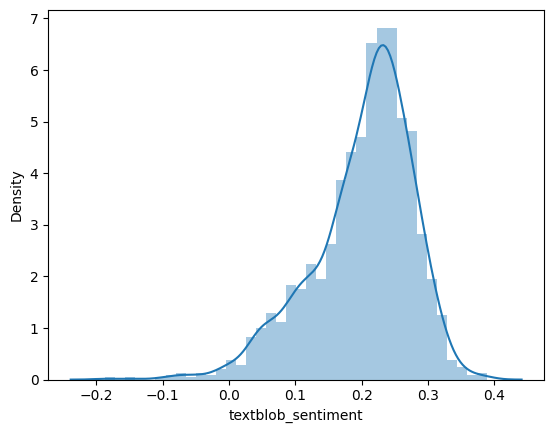

In [ ]:
sns.distplot(df[df['decision']=='select']['textblob_sentiment'])

<ipython-input-67-def925f8f3b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['decision']=='reject']['textblob_sentiment'])


<Axes: xlabel='textblob_sentiment', ylabel='Density'>

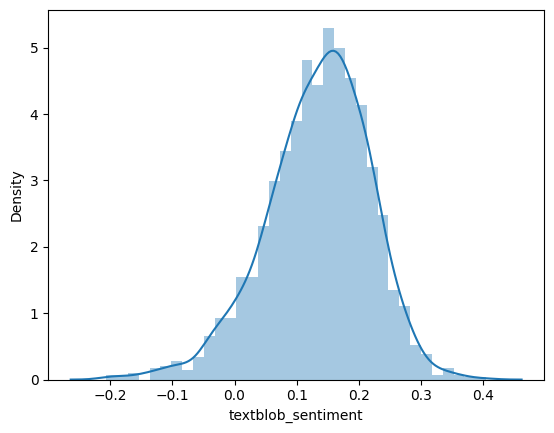

In [ ]:
sns.distplot(df[df['decision']=='reject']['textblob_sentiment'])

## **INSIGHTS(FINDINGS)**

**1. Rejected Transcripts:** The distribution of word counts in rejected transcripts peaks at a lower value, indicating that transcripts with fewer words are more likely to be rejected.

**2. Selected Transcripts:** The distribution of word counts in selected transcripts peaks at a higher value, suggesting that longer transcripts are more likely to be selected.

**3. Decision-Based Patterns:** Selected candidates have longer transcripts; rejected ones have shorter.

**4. Variability:** High std shows varied lengths; low std shows consistent lengths.

**5. Transcript Score:** Combined Score of Cosine similarity and BERT based Similarity is calculated which is high for selected candidates than the rejected candidates.

**6. Hexbin Plots:** Most of the interview transcripts, regardless of the number of words, seem to score similarly in the range of 70-90, with a few outliers at both ends of the spectrum.

**7.** The skills mentioned in the resume and transcripts are highlighted.

**8. Skillgap:** The differenece between what is given in the resume and present in the transcript.

**9. Education:** There are more similarities between the educational details present in resume with those mentioned in the transcript.

**10. Sentiment Analysis:** The sentiment analysed (the tone of the transcript) is more or less the same for the selected candidates al well as the rejected candidates.